#Problem description

##Context
Police deparments are stirving to implement more automated and predictive data systems into their everyday processes to reduce crime and deploy scarce resources more efficiently. This provides an opportunity for more proactive policing if it were possible to alert
resources of abnormal patterns in the data as they occur. Boston police department released public dataset with crime incident reports reported to its 911 call center.
https://data.cityofboston.gov/Public-Safety/Crime-Incident-Reports/7cdf-6fgx

##Challenge
Examine the dataset and point out any inconsistencies and trends that you see


In [45]:
import numpy as np
import pandas as pd
import numpy.random as nprnd
import scipy.stats as stats
import matplotlib.pyplot as plt

FILE_NAME = 'Data/Crime_Incident_Reports.csv'

#Load Data
Using statndard tools as much as possible, avoiding using hand written parsers

In [46]:
df = pd.read_csv(FILE_NAME)
df.columns

/home/boris/keras-environment/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Index(['COMPNOS', 'NatureCode', 'INCIDENT_TYPE_DESCRIPTION', 'MAIN_CRIMECODE',
       'REPTDISTRICT', 'REPORTINGAREA', 'FROMDATE', 'WEAPONTYPE', 'Shooting',
       'DOMESTIC', 'SHIFT', 'Year', 'Month', 'DAY_WEEK', 'UCRPART', 'X', 'Y',
       'STREETNAME', 'XSTREETNAME', 'Location'],
      dtype='object')

#Check data completeness
This looks like a reasonably clean dataset with exception of field XSTREETNAME. Many of the fields are 100% complete, most of the fields are at least about 95% complete

In [47]:
round(1000*df.count()/len(df))/10

COMPNOS                       95.4
NatureCode                    99.4
INCIDENT_TYPE_DESCRIPTION    100.0
MAIN_CRIMECODE               100.0
REPTDISTRICT                  99.9
REPORTINGAREA                100.0
FROMDATE                     100.0
WEAPONTYPE                   100.0
Shooting                     100.0
DOMESTIC                     100.0
SHIFT                         95.4
Year                         100.0
Month                        100.0
DAY_WEEK                     100.0
UCRPART                      100.0
X                             94.4
Y                             94.4
STREETNAME                    99.9
XSTREETNAME                   18.2
Location                     100.0
dtype: float64

#Districts
First, we see that incidents are reported by DISTRICT. In order to conduct quick analysis, we concentrate on the district with the highest count of events. We can check if trends change on the district by district basis later, when we do a more detailed analysis. Below we compute call counts by district and make a bar plot of counts. It looks like B2 is the district with most counts. We filter the full dataset and retain only rows originating from district B2.

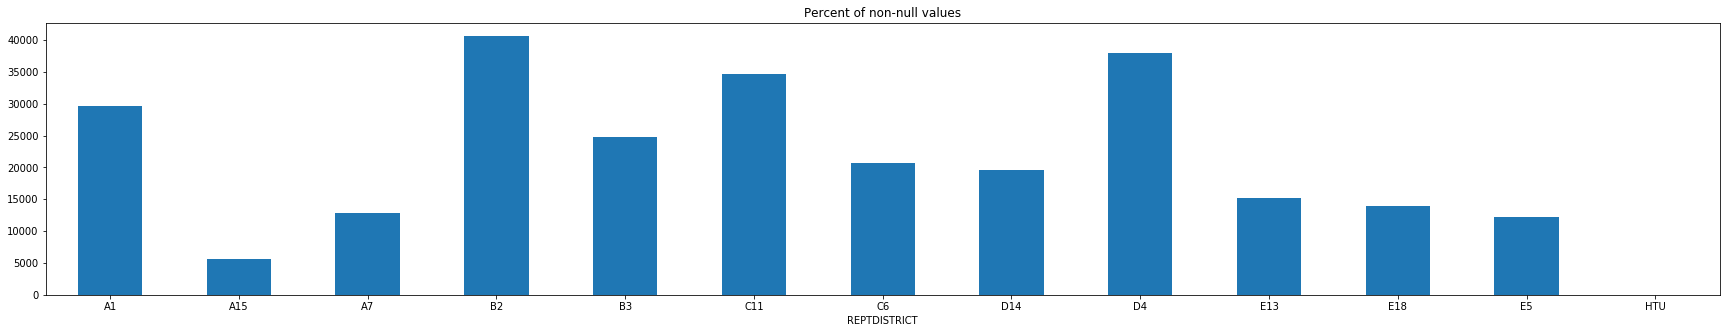

In [48]:
num_counts = df.groupby('REPTDISTRICT').count().max(axis=1)
num_counts.plot(kind='bar', title="Percent of non-null values", use_index=True, figsize=(30, 5))
plt.xticks(rotation=0)
plt.show()

In [49]:
df_B2 = df[df['REPTDISTRICT'] == 'B2']
df_B2.head()

,COMPNOS,NatureCode,INCIDENT_TYPE_DESCRIPTION,MAIN_CRIMECODE,REPTDISTRICT,REPORTINGAREA,FROMDATE,WEAPONTYPE,Shooting,DOMESTIC,SHIFT,Year,Month,DAY_WEEK,UCRPART,X,Y,STREETNAME,XSTREETNAME,Location
1,120419202.0,PSHOT,AGGRAVATED ASSAULT,04xx,B2,327,07/08/2012 06:03:00 AM,Firearm,Yes,No,Last,2012,7,Sunday,Part One,771223.1638,2940772.099,HOWARD AV,NaN,"(42.31684135, -71.07458456)"
3,120419223.0,ALARMC,COMMERCIAL BURGLARY,05CB,B2,258,07/08/2012 06:56:00 AM,Other,No,No,Last,2012,7,Sunday,Part One,773591.8648,2940638.174,COLUMBIA RD,NaN,"(42.3164411, -71.06582908)"
6,120419257.0,ARMROB,ROBBERY,03xx,B2,295,07/08/2012 07:50:00 AM,Firearm,No,No,Day,2012,7,Sunday,Part One,768066.0298,2943456.962,REGENT ST,HERMAN ST,"(42.32425136, -71.08620956)"
18,120419382.0,IVMV,WEAPONS CHARGE,15xx,B2,296,07/08/2012 09:55:00 AM,Firearm,No,No,Day,2012,7,Sunday,Part Two,769233.4040,2942533.368,WARREN ST,COPELAND ST,"(42.32170135, -71.08190956)"
20,120419772.0,INJOFF,MedAssist,MedAssist,B2,296,07/08/2012 10:00:00 AM,Unarmed,No,No,Day,2012,7,Sunday,Part Three,769183.8241,2942717.161,WARREN ST,NaN,"(42.32220635, -71.08208955)"


#Now check the time range
If we decide to learn a model on this dataset it is generally necessary to know how much data in terms of years we have. Typically in time series applications like this we would like to split the dataset into train and test based on time. This is to control for the dynamic changes in the system we observe and assess how well they are captured by the model. We can see that we have over 3 years of data, July 08 2012 to August 10, 2015, a total of 1128 days. This may or may not be enough for modeling depending on which trends we see in the data and on the complexity of models we consider.

In [92]:
df_B2['FROMDATE'] = pd.to_datetime(df_B2['FROMDATE'])
df_B2.index = df_B2['FROMDATE']
print('Start date:', df_B2.index.min(), 'End date: ', df_B2.index.max())

Start date: 2012-07-08 06:03:00 End date:  2015-08-10 04:48:00


/home/boris/keras-environment/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


#Plot time series of counts aggregated over days
Below we plot what seems to be a very nice time series. Some yearly trends are pretty obvious, but we will return to a more detailed analysis of trends later on.

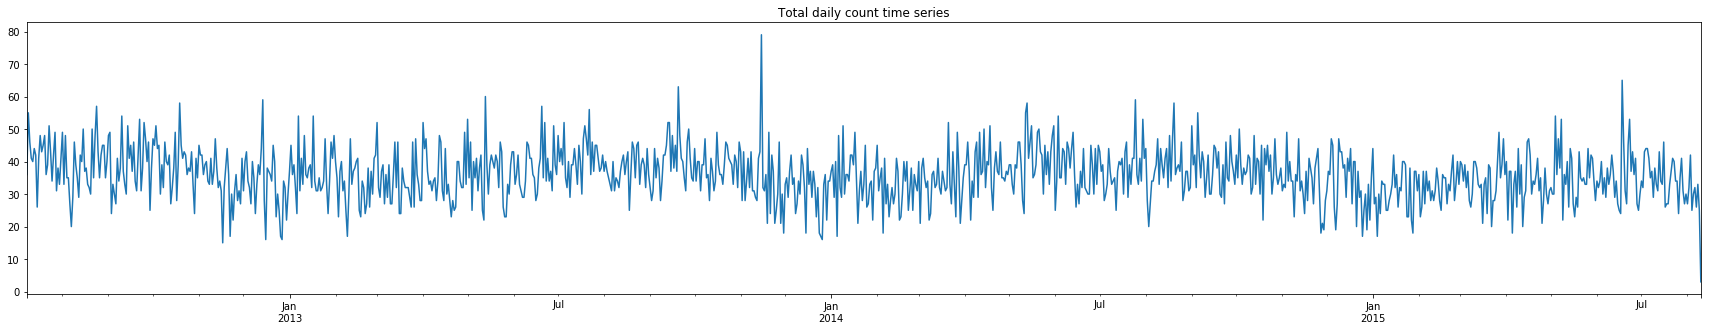

In [93]:
df_B2_daily_counts = df_B2.index.value_counts().resample('D').sum()
df_B2_daily_counts.plot(kind='line', title="Total daily count time series", use_index=True, figsize=(30, 5))
plt.xticks(rotation=0)
plt.show()

#Plot time series of counts aggregated over hours

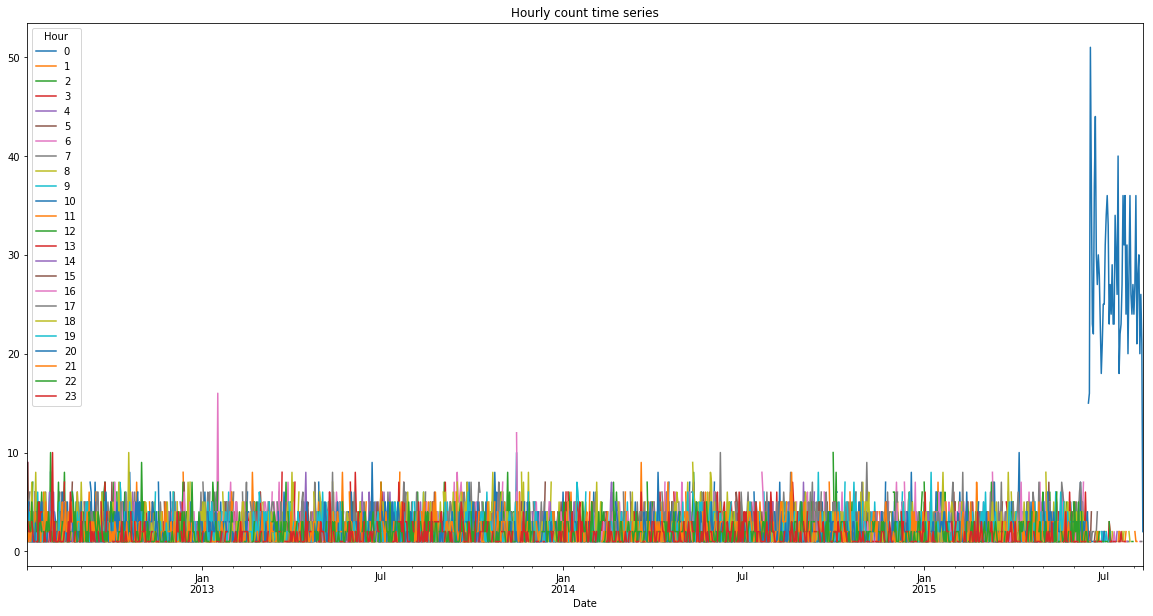

In [94]:
df_B2_hour_counts = pd.DataFrame(df_B2.index.value_counts().resample('H').sum())

df_B2_hour_counts['Date'] = df_B2_hour_counts.index.date
df_B2_hour_counts['Hour'] = df_B2_hour_counts.index.hour
df_B2_hour_counts = df_B2_hour_counts.set_index(['Date', 'Hour'], append=False)

df_B2_hour_counts = df_B2_hour_counts['FROMDATE'].unstack('Hour')
df_B2_hour_counts.plot(kind='line', title="Hourly count time series", use_index=True, figsize=(20, 10))
plt.show()

We can see that something happened in June 2015. Data starting from index 1073 (2015-06-16) seem to be corrupted: almost all calls for each of those days are registered between 00:00 and 01:00 AM. This could be either a sign of system malfunction or a dataset construction
error.Thus days following day 1073 were excluded from analysis.

In [95]:
df_B2_hour_counts = df_B2_hour_counts.loc[:'2015-06-16']
df_B2_daily_counts = df_B2_daily_counts.loc[:'2015-06-16']

#Analyzing trend and seasonalities
It looks like the time series does not have any observable trend in the rolling 21 day mean or vaiance. However, the yearly seasonality seems to be present in the rolling mean and not in the rolling standard deviation.

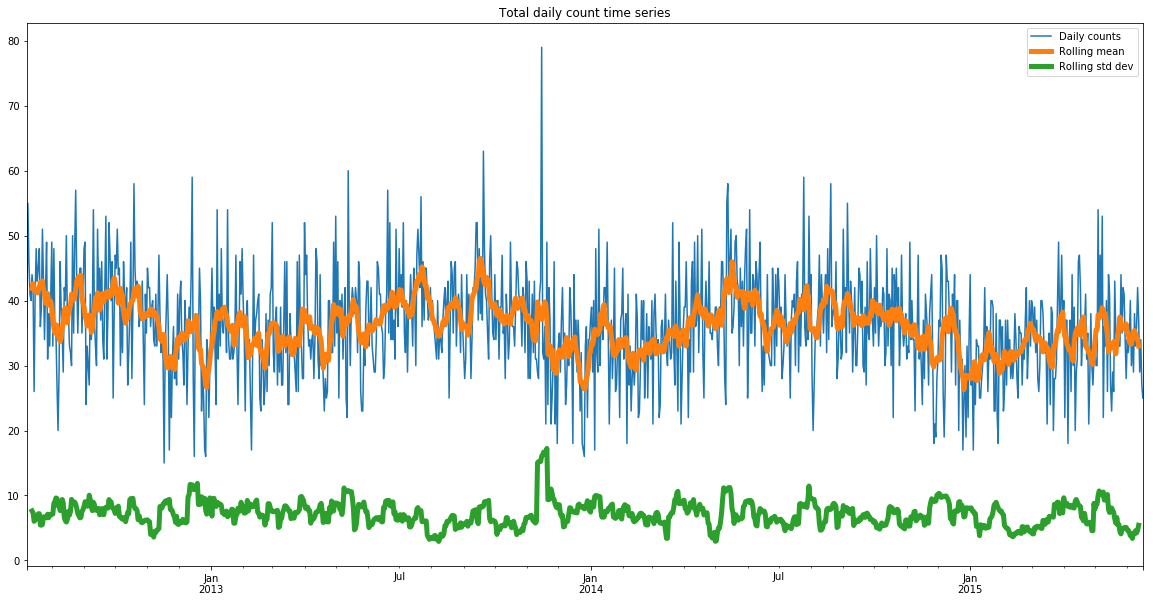

In [100]:
df_B2_daily_counts.plot(kind='line', title="Total daily count time series", use_index=True, label='Daily counts', legend=True, figsize=(20, 10))
df_B2_daily_counts.rolling(window=10, center=True).mean().plot(linewidth=5.0, label='Rolling mean', legend=True)
np.sqrt(df_B2_daily_counts.rolling(window=10, center=True).var()).plot(linewidth=5.0, label='Rolling std dev', legend=True)
plt.xticks(rotation=0)
plt.show()